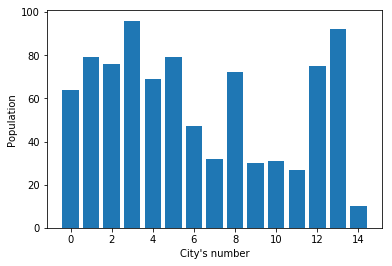

In [3]:
import numpy as np
import matplotlib.pyplot as plt

cities = np.random.randint(10, 100, 15)

plt.bar(np.arange(len(cities)), cities)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

In [5]:
def step(current, cities):
    direction = np.random.choice([-1, 1])
    target = (current + direction) % len(cities)
    ratio = cities[target] / cities[current]
    return target if np.random.rand() < ratio else current

In [6]:
walk = []
current = 1
for i in range(10000):
    current = step(current, cities)
    walk.append(current)

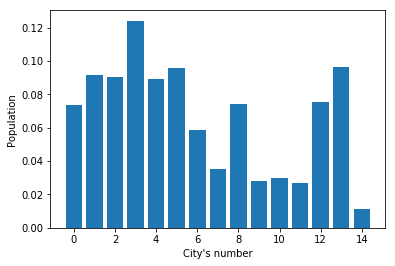

In [11]:
plt.hist(walk, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

In [15]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.
    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

In [22]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grid(narr):
    '''Plots 2d lattice with vertices colored in black and red according to given mask.
    Vertice is colored black if narr[i, j] == True and red otherwise.
    
    Parameters
    ----------
    narr : 2d boolean ndarray
        Mask for vertices colors
    '''

    if narr.dtype != 'bool':
        raise ValueError('narr should be a boolean ndarray')
    colors = np.empty(narr.shape, dtype='U5')
    colors[:] = 'red'
    colors[narr] = 'black'
    x, y = np.indices((narr.shape))
    plt.scatter(x, y, c=colors.ravel())
    plt.show()

Домашнее задание

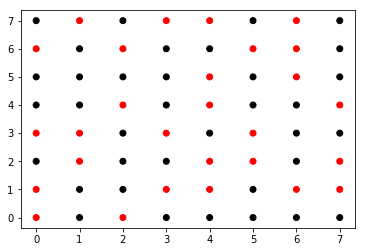

In [24]:
size = 8
narr = np.random.choice([0, 1], size=size**2).reshape((size, size)).astype('bool')
plot_grid(narr)

In [78]:
def change(i,j,mask):
    if(mask[i,j]==1):
        return 1
    if(mask[i,j]==0):
        s=0
        mas=[]
        if((0<=(i-1)<N) and (0<=j<N)):
            mas.append([i-1,j])
        if((0<=(i+1)<N) and (0<=j<N)):
            mas.append([i+1,j])
        if((0<=i<N) and (0<=(j-1)<N)):
            mas.append([i,j-1])
        if((0<=i<N) and (0<=(j+1)<N)):
            mas.append([i,j+1])
        for t in range(0,len(mas)):
            a,b=mas[t]
            s=s+mask[a,b]
            if(s!=0):
                return 0
        return 1

In [169]:
def next_step(cur):
    cur_mas=[]
    for i in range(N):
        for j in range(N):
            s=change(i,j,cur)
            if(s==1):
                cur_mas.append([i,j])
    a,b=cur_mas[np.random.randint(len(cur_mas))]
    proposal=cur.copy()
    proposal[a][b]=(proposal[a][b]+1)%2
    mas_for_proposal=[]
    for i in range(N):
        for j in range(N):
            s=change(i,j,proposal)
            if(s==1):
                mas_for_proposal.append([i,j])
    ratio=len(cur_mas)/len(mas_for_proposal)
    if(np.random.uniform()<ratio):
        return proposal
    else:
        return cur

In [177]:
def apost_distrib(start,n_iter):
    cur=start.copy()
    a=[start]
    for i in range(n_iter):
        cur=next_step(cur)
        a.append(cur.copy())
    return a

In [182]:
def amount_of_painted_tops(distrib):
    a=[]
    for i in range(len(distrib)):
        count=0
        for j in range(N):
            for k in range(N):
                if((distrib[i])[j][k]==1):
                    count=count+1
        a.append(count)
    return a

In [183]:
N=8
n_iter=10000
start=np.zeros(N*N).reshape(N,N)
distrib=apost_distrib(start,n_iter)
painted_tops=amount_of_painted_tops(distrib)
mean=np.array(painted_tops).mean()
print("среднее значение=",mean)

среднее значение= 15.427657234276573


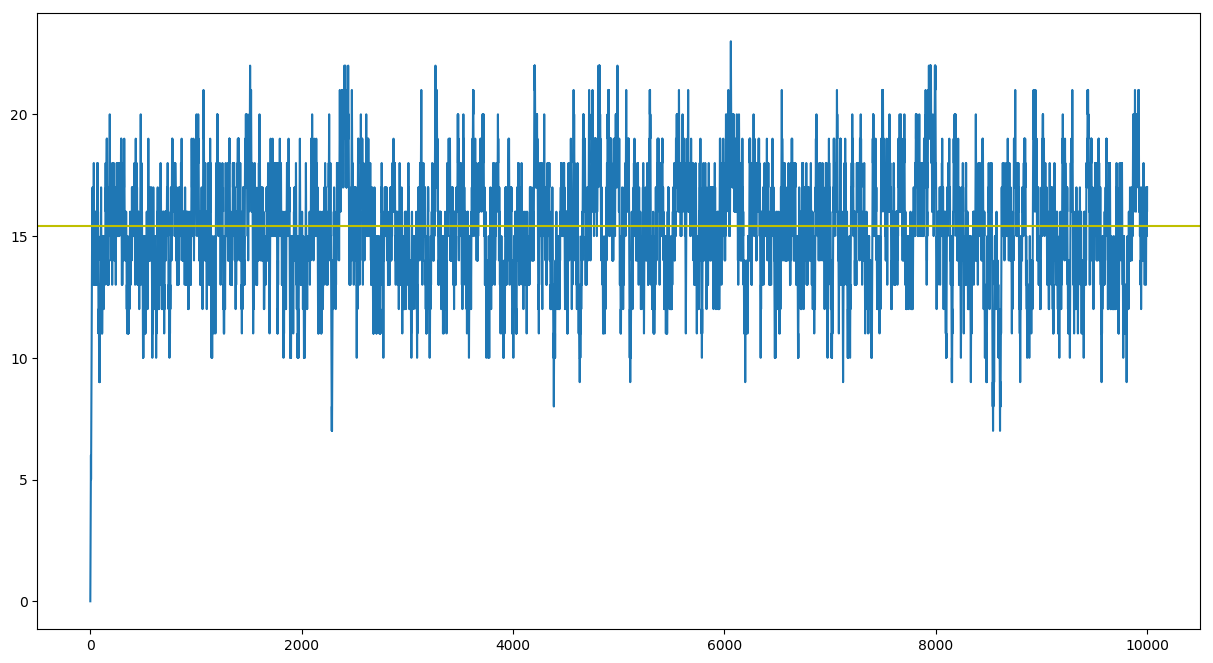

In [184]:
#Стационарность
plt.rcdefaults()
plt.figure(figsize=(15,8))
plt.plot(shaded_tops)
plt.axhline(mean,c='y')
plt.show()

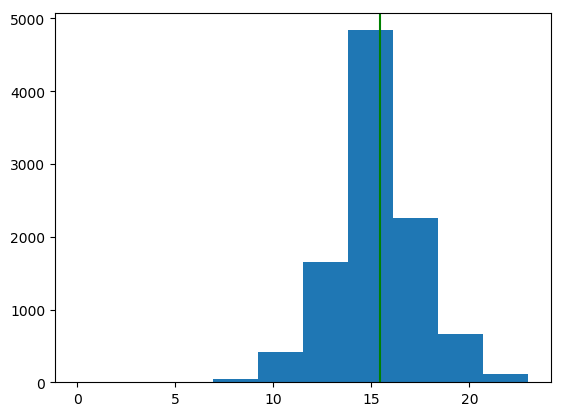

In [185]:
#Гистограмма
plt.rcdefaults()
plt.hist(shaded_tops)
plt.axvline(mean,c='g')
plt.show()